In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pygame
import pygame.font

BLACK = (0  ,0  ,0  )
WHITE = (255,255,255)
GREEN = (0  ,150,40 )

pygame 2.6.1 (SDL 2.30.10, Python 3.13.1)
Hello from the pygame community. https://www.pygame.org/contribute.html


<frozen importlib._bootstrap>:488: RuntimeWarning: Your system is avx2 capable but pygame was not built with support for it. The performance of some of your blits could be adversely affected. Consider enabling compile time detection with environment variables like PYGAME_DETECT_AVX2=1 if you are compiling without cross compilation.


In [2]:
def RK4(fun, x, dt, t = 0, a = 0):

    k1 = fun(t,      x,         a)
    k2 = fun(t+dt/2, x+dt*k1/2, a)
    k3 = fun(t+dt/2, x+dt*k2/2, a)
    k4 = fun(t+dt,   x+dt*k3,   a)

    y = x + dt/6*(k1+2*k2+2*k3+k4)
    return y

In [3]:
l   = 200
g   = 980
gamma = .1
gammath = .1

cart_size = [40,20]
cart_pos  = [400-20,300-10]

rail_height = cart_pos[1]+cart_size[1]/2

def cart_evol(t, x, a = 0):
    vDot = a - gamma * x[1]
    xDot = x[1]
    return np.array([xDot, vDot])

def pend_evol(t, x, a = 0):
    thDotDot = (a * np.cos(x[0]) - g * np.sin(x[0]))/l - gammath * x[1]
    thDot    = x[1]
    return np.array([thDot, thDotDot])

def get_pos_pend(ang, point, L):
    return point[0] - L*np.sin(ang), point[1] + L*np.cos(ang)

def draw_player(screen, cart, pend_pos):
    pygame.draw.line(screen, BLACK,
                    cart.center, pend_pos,
                    width = 6)
    pygame.draw.rect(screen, WHITE, cart)
    pygame.draw.rect(screen, BLACK, cart, 4)
    pygame.draw.circle(screen, WHITE, pend_pos, 20)
    pygame.draw.circle(screen, BLACK, pend_pos, 20, 5)

def update_screen(screen, cart, th,dt):
    screen.fill((255,255,255))

    pend_pos  = get_pos_pend(th, cart.center, l)

    global target_H, score
    if target_H:
        pygame.draw.line(screen, GREEN, (0,target_H), (1600,target_H), 6)
        if pend_pos[1] < target_H:
            score += dt
    pygame.draw.line(screen, BLACK, (100, rail_height-30), (100, rail_height+30), 4)
    pygame.draw.line(screen, BLACK, (100, rail_height), (1440, rail_height), 4)
    pygame.draw.line(screen, BLACK, (1440, rail_height-30), (1440, rail_height+30), 4)
    draw_player(screen, cart, pend_pos)
    

In [5]:
target_th = 2.5
target_H = get_pos_pend(target_th, cart_pos, l)[1]

thvlist = []

th, thDot  = 0, 0
a, v, x = 0, 0, cart_pos[0]
# Añado esto para poder tratar mejor las colisiones en los bordes
a_pend = a

score = 0

pygame.init()
pygame.font.init()

screen = pygame.display.set_mode((1500,600))
clock  = pygame.time.Clock()
player = pygame.Rect(cart_pos+cart_size)

my_font = pygame.font.SysFont('Comic Sans MS', 50)

pend_pos = get_pos_pend(th, player.center, l)
dt = clock.tick()

time = 0
while time < 20:
  
  time = pygame.time.get_ticks()/1000
  dt = clock.tick(120)/1000 # Por los milisecs
  
  if player.x < 100:
    x, a = 100, -v/dt * .2
    a_pend = -v/dt * 1.2
    v = 0
  elif player.x > 1400:
    x, a = 1400, -v/dt * .2
    a_pend = -v/dt * 1.2
    v = 0
  
  x, v = RK4(cart_evol, [x, v], dt, a = a)
  th, thDot = RK4(pend_evol, [th, thDot], dt, a = a_pend)
  player.move_ip(x-player.x, 0)

  update_screen(screen, player, th,dt)
  # time and fps'{:-9} YES votes  {:2.2%}'.format(yes_votes, percentage)
  screen.blit(my_font.render("TIME: %.1f"%(time), False, BLACK), (100,100))
  screen.blit(my_font.render("SCORE: %.1f"%(score), False, GREEN), (100,50))
  #screen.blit(my_font.render("FPS: %i"%(clock.get_fps()), False, BLACK), (100,150))
  screen.blit(my_font.render("dt [ms]: %i"%(dt*1000), False, BLACK), (100,150))

  key = pygame.key.get_pressed()
  if key[pygame.K_a] == True:
    a = -1000
  elif key[pygame.K_d] == True:
    a = 1000
  else:
    a = 0
  a_pend = a
  
  for event in pygame.event.get():
    if event.type == pygame.QUIT:
      pygame.quit()
      continue
  
  thvlist.append(thDot)

  pygame.display.update()

pygame.quit()
print(score)

3.523999999999985


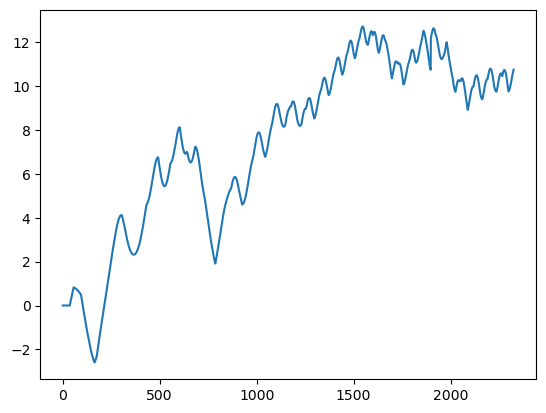

In [6]:
plt.plot(thvlist)

# Testing

In [ ]:
l = 1
g = 9.8

In [ ]:
def fun(t, x, a_ext = 0):
    thDotDot = (a_ext * np.cos(x[0]) - g * np.sin(x[0]))/l
    thDot    = x[1]
    return np.array([thDot, thDotDot])

def RK4(fun, x, dt, t = 0, a = 0):

    k1 = fun(t,      x,         a)
    k2 = fun(t+dt/2, x+dt*k1/2, a)
    k3 = fun(t+dt/2, x+dt*k2/2, a)
    k4 = fun(t+dt,   x+dt*k3,   a)

    y = x + dt/6*(k1+2*k2+2*k3+k4)
    return y

In [ ]:
delta_t = 1E-3
steps   = int(1e4)

x1 = np.zeros(steps)
x2 = np.zeros(steps)

x1[0], x2[0] = 1, 0

for step in range(1, steps):
    x1[step], x2[step] = RK4(cart_evol, [x1[step-1], x2[step-1]], delta_t, a = 20)

plt.plot(x1)
#plt.plot(x2)